# EDA and Data Preprocessing

This notebook provides an exploratory data analysis on the arXiv dataset. The collection process is available here in [this notebook](00_arxiv_scraping.ipynb).

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

In [3]:
PATH_DATA_BASE = Path.cwd().parent / "data"

## Performing basic EDA

In this section, we first load the dataset into a pandas.Dataframe and then perform some basic exploratory data analysis (EDA).

In [4]:
# Setting pandas option to display the full content of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

arxiv_data = pd.read_csv(PATH_DATA_BASE / "data.csv")
arxiv_data.head()

,titles,abstracts,terms,urls
0,Compositionally Equivariant Representation Learning,"Deep learning models often need sufficient supervision (i.e. labelled data)\nin order to be trained effectively. By contrast, humans can swiftly learn to\nidentify important anatomy in medical images like MRI and CT scans, with\nminimal guidance. This recognition capability easily generalises to new images\nfrom different medical facilities and to new tasks in different settings. This\nrapid and generalisable learning ability is largely due to the compositional\nstructure of image patterns in the human brain, which are not well represented\nin current medical models. In this paper, we study the utilisation of\ncompositionality in learning more interpretable and generalisable\nrepresentations for medical image segmentation. Overall, we propose that the\nunderlying generative factors that are used to generate the medical images\nsatisfy compositional equivariance property, where each factor is compositional\n(e.g. corresponds to the structures in human anatomy) and also equivariant to\nthe task. Hence, a good representation that approximates well the ground truth\nfactor has to be compositionally equivariant. By modelling the compositional\nrepresentations with learnable von-Mises-Fisher (vMF) kernels, we explore how\ndifferent design and learning biases can be used to enforce the representations\nto be more compositionally equivariant under un-, weakly-, and semi-supervised\nsettings. Extensive results show that our methods achieve the best performance\nover several strong baselines on the task of semi-supervised domain-generalised\nmedical image segmentation. Code will be made publicly available upon\nacceptance at https://github.com/vios-s.","['cs.CV', 'cs.LG']",http://arxiv.org/abs/2306.07783v1
1,Aria Digital Twin: A New Benchmark Dataset for Egocentric 3D Machine Perception,"We introduce the Aria Digital Twin (ADT) - an egocentric dataset captured\nusing Aria glasses with extensive object, environment, and human level ground\ntruth. This ADT release contains 200 sequences of real-world activities\nconducted by Aria wearers in two real indoor scenes with 398 object instances\n(324 stationary and 74 dynamic). Each sequence consists of: a) raw data of two\nmonochrome camera streams, one RGB camera stream, two IMU streams; b) complete\nsensor calibration; c) ground truth data including continuous\n6-degree-of-freedom (6DoF) poses of the Aria devices, object 6DoF poses, 3D eye\ngaze vectors, 3D human poses, 2D image segmentations, image depth maps; and d)\nphoto-realistic synthetic renderings. To the best of our knowledge, there is no\nexisting egocentric dataset with a level of accuracy, photo-realism and\ncomprehensiveness comparable to ADT. By contributing ADT to the research\ncommunity, our mission is to set a new standard for evaluation in the\negocentric machine perception domain, which includes very challenging research\nproblems such as 3D object detection and tracking, scene reconstruction and\nunderstanding, sim-to-real learning, human pose prediction - while also\ninspiring new machine perception tasks for augmented reality (AR) applications.\nTo kick start exploration of the ADT research use cases, we evaluated several\nexisting state-of-the-art methods for object detection, segmentation and image\ntranslation tasks that demonstrate the usefulness of ADT as a benchmarking\ndataset.","['cs.CV', 'cs.AI', 'cs.LG']",http://arxiv.org/abs/2306.06362v2
2,Mean Shift Mask Transformer for Unseen Object Instance Segmentation,"Segmenting unseen objects from images is a critical perception skill that a\nrobot needs to acquire. In robot manipulation, it can facilitate a robot to\ngrasp and manipulate unseen objects. Mean shift clustering is a widely used\nmethod for image segmentation tasks. However, the traditional mean shift\nclustering algorithm is not differentiable, making it difficult to integrate it\ninto an end-to-end neural network trainin

In [5]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 67312 rows in the dataset.


Real-world data is noisy. One of the most commonly observed source of noise is data duplication. Here we notice that our initial dataset has got about 17k duplicate entries.

In [6]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 17764 duplicate titles.


Note that the 'terms' column is a string representation of a list. We are converting it to a list using the ast.literal_eval function.

In [7]:
arxiv_data['terms'] = arxiv_data['terms'].apply(ast.literal_eval)
arxiv_data.head()

,titles,abstracts,terms,urls
0,Compositionally Equivariant Representation Learning,"Deep learning models often need sufficient supervision (i.e. labelled data)\nin order to be trained effectively. By contrast, humans can swiftly learn to\nidentify important anatomy in medical images like MRI and CT scans, with\nminimal guidance. This recognition capability easily generalises to new images\nfrom different medical facilities and to new tasks in different settings. This\nrapid and generalisable learning ability is largely due to the compositional\nstructure of image patterns in the human brain, which are not well represented\nin current medical models. In this paper, we study the utilisation of\ncompositionality in learning more interpretable and generalisable\nrepresentations for medical image segmentation. Overall, we propose that the\nunderlying generative factors that are used to generate the medical images\nsatisfy compositional equivariance property, where each factor is compositional\n(e.g. corresponds to the structures in human anatomy) and also equivariant to\nthe task. Hence, a good representation that approximates well the ground truth\nfactor has to be compositionally equivariant. By modelling the compositional\nrepresentations with learnable von-Mises-Fisher (vMF) kernels, we explore how\ndifferent design and learning biases can be used to enforce the representations\nto be more compositionally equivariant under un-, weakly-, and semi-supervised\nsettings. Extensive results show that our methods achieve the best performance\nover several strong baselines on the task of semi-supervised domain-generalised\nmedical image segmentation. Code will be made publicly available upon\nacceptance at https://github.com/vios-s.","[cs.CV, cs.LG]",http://arxiv.org/abs/2306.07783v1
1,Aria Digital Twin: A New Benchmark Dataset for Egocentric 3D Machine Perception,"We introduce the Aria Digital Twin (ADT) - an egocentric dataset captured\nusing Aria glasses with extensive object, environment, and human level ground\ntruth. This ADT release contains 200 sequences of real-world activities\nconducted by Aria wearers in two real indoor scenes with 398 object instances\n(324 stationary and 74 dynamic). Each sequence consists of: a) raw data of two\nmonochrome camera streams, one RGB camera stream, two IMU streams; b) complete\nsensor calibration; c) ground truth data including continuous\n6-degree-of-freedom (6DoF) poses of the Aria devices, object 6DoF poses, 3D eye\ngaze vectors, 3D human poses, 2D image segmentations, image depth maps; and d)\nphoto-realistic synthetic renderings. To the best of our knowledge, there is no\nexisting egocentric dataset with a level of accuracy, photo-realism and\ncomprehensiveness comparable to ADT. By contributing ADT to the research\ncommunity, our mission is to set a new standard for evaluation in the\negocentric machine perception domain, which includes very challenging research\nproblems such as 3D object detection and tracking, scene reconstruction and\nunderstanding, sim-to-real learning, human pose prediction - while also\ninspiring new machine perception tasks for augmented reality (AR) applications.\nTo kick start exploration of the ADT research use cases, we evaluated several\nexisting state-of-the-art methods for object detection, segmentation and image\ntranslation tasks that demonstrate the usefulness of ADT as a benchmarking\ndataset.","[cs.CV, cs.AI, cs.LG]",http://arxiv.org/abs/2306.06362v2
2,Mean Shift Mask Transformer for Unseen Object Instance Segmentation,"Segmenting unseen objects from images is a critical perception skill that a\nrobot needs to acquire. In robot manipulation, it can facilitate a robot to\ngrasp and manipulate unseen objects. Mean shift clustering is a widely used\nmethod for image segmentation tasks. However, the traditional mean shift\nclustering algorithm is not differentiable, making it difficult to integrate it\ninto an end-to-end neural network training framewor

### Distribution of Terms

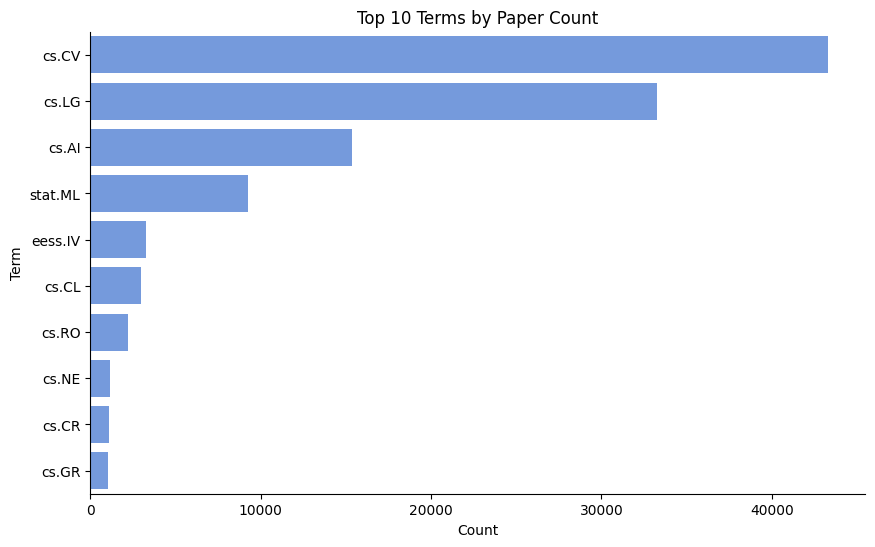

In [8]:
# Get all terms
all_terms = [term for sublist in arxiv_data['terms'].tolist() for term in sublist]

# Count terms
terms_count = Counter(all_terms)

# Create dataframe
df_terms = pd.DataFrame.from_dict(terms_count, orient='index').reset_index()
df_terms.columns = ['Term', 'Count']

# Sort by count and take the top 10
df_terms_top10 = df_terms.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Term', data=df_terms_top10, color='cornflowerblue')

# Remove top and right spines
sns.despine()

plt.title('Top 10 Terms by Paper Count')
plt.show()

### Word Cloud of Titles

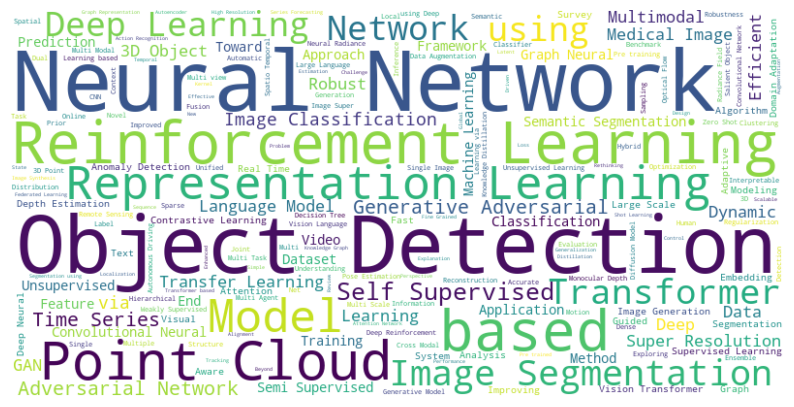

In [9]:
from wordcloud import WordCloud

# Concatenate all titles
all_titles = ' '.join(arxiv_data['titles'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400).generate(all_titles)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Before proceeding further, we drop these entries.

In [10]:
arxiv_data = arxiv_data[~arxiv_data["titles"].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")

There are 49548 rows in the deduplicated dataset.


In [11]:
arxiv_data.to_csv(PATH_DATA_BASE / 'filtered_data.csv', index=False)

## Approaches

We will be testing two approaches to recommend papers to a user.


- The first approach is a content-based approach, where we will be recommending papers based on the similarity of their titles.
- The second approach is also a content-based approach but we will be recommending papers based on the similarity of their abstract.

### Content-based approach using titles

Let's us start by exploring the first approach.

Since we are using the titles of the papers to recommend similar papers, we can drop the other columns.

In [19]:
titles_dataset = arxiv_data.drop(columns = ["abstracts"])

In [20]:
titles_dataset.head()

,titles,terms,urls
0,Mean Shift Mask Transformer for Unseen Object Instance Segmentation,"[cs.CV, cs.AI, cs.LG, cs.RO]",http://arxiv.org/abs/2211.11679v2
1,AerialFormer: Multi-resolution Transformer for Aerial Image Segmentation,[cs.CV],http://arxiv.org/abs/2306.06842v1
2,VPUFormer: Visual Prompt Unified Transformer for Interactive Image Segmentation,"[cs.CV, cs.RO, eess.IV]",http://arxiv.org/abs/2306.06656v1
3,AutoSAM: Adapting SAM to Medical Images by Overloading the Prompt Encoder,[cs.CV],http://arxiv.org/abs/2306.06370v1
4,Aria Digital Twin: A New Benchmark Dataset for Egocentric 3D Machine Perception,"[cs.CV, cs.AI, cs.LG]",http://arxiv.org/abs/2306.06362v1


In [21]:
average_title_length = int(titles_dataset['titles'].apply(len).mean())
print(f"The average text length of a title is {average_title_length} characters.")

The average text length of a title is 73 characters.


In [44]:
# Calculate the length of each title
titles_dataset['title_length'] = titles_dataset['titles'].apply(len)

In [45]:
# Calculate the min and max length
min_length = titles_dataset['title_length'].min()
max_length = titles_dataset['title_length'].max()

print('The minimum length of a title:', min_length)
print('The maximum length of a title:', max_length)

The minimum length of a title: 7
The maximum length of a title: 217


In [22]:
def plot_length_distribution(df, column_name) -> None:
    """
    Plots a histogram representing the distribution of lengths in a specified column of a DataFrame. 
    The histogram also displays the mean length and one standard deviation above and below the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column in the DataFrame for which to plot the length distribution.

    Returns:
        None. This function outputs a plot.
    """
    
    # Compute the lengths of all titles
    title_lengths = df[column_name].apply(len)

    # Calculate mean and standard deviation
    mean_length = title_lengths.mean()
    std_length = title_lengths.std()

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(title_lengths, bins=50, color='b', alpha=0.2)

    # Add lines for the mean and standard deviation
    plt.axvline(mean_length, color='r', linestyle='-', linewidth=1.5)
    plt.axvline(mean_length - std_length, color='gray',
                linestyle='--', linewidth=1)
    plt.axvline(mean_length + std_length, color='gray',
                linestyle='--', linewidth=1)

    # Add a text box with the mean value
    plt.text(mean_length+5, plt.gca().get_ylim()
             [1]*0.9, f"Mean: {mean_length:.2f}", fontsize=10)

    plt.title('Distribution of ' + column_name.capitalize() + ' Lengths')
    plt.xlabel(column_name.capitalize() + ' Length')
    plt.ylabel('Frequency')
    plt.legend(['Mean', 'Standard Deviation'])
    plt.show()

In [23]:
def plot_top_words(df, column_name) -> None:
    """
    Plot the top 10 most common words in a specified column of a DataFrame.

    The function tokenizes the strings, converts to lower case, removes non-alphabetic tokens 
    and stop words, counts the frequency of each word, and then plots the 10 most common words 
    using a horizontal bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column of the DataFrame to analyze.

    Returns:
        None. The function shows a plot.
    """
    
    # Create a single string containing all sentences
    all_setences= " ".join(df[column_name].values)

    # Tokenize the string
    tokens = word_tokenize(all_setences)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove non-alphabetic tokens and stop words
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Count the frequency of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common = counter.most_common(10)

    # Create a DataFrame from the most common words
    most_common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    # Plot the results using seaborn
    plt.figure(figsize=(10,6))
    sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')
    
    # Change font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.title(f'Top 10 Words in {column_name} column', fontsize=16)
    plt.show()

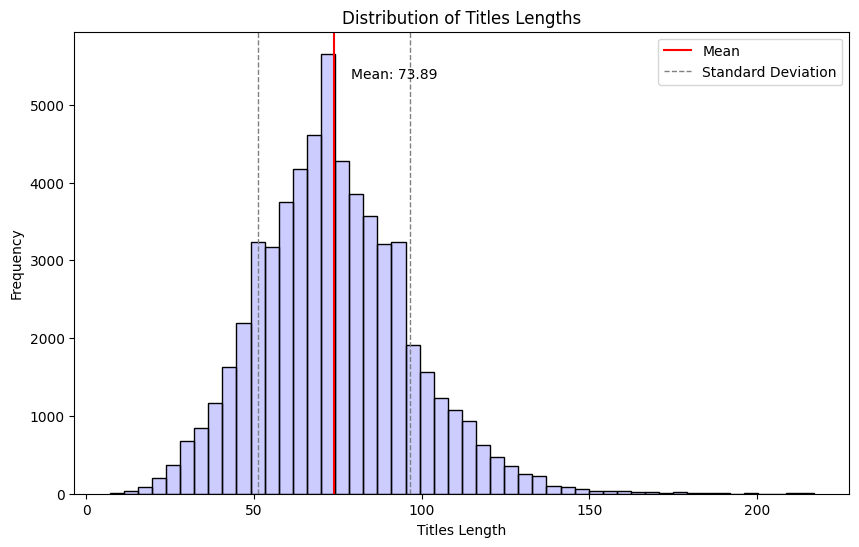

In [24]:
plot_length_distribution(titles_dataset, 'titles')

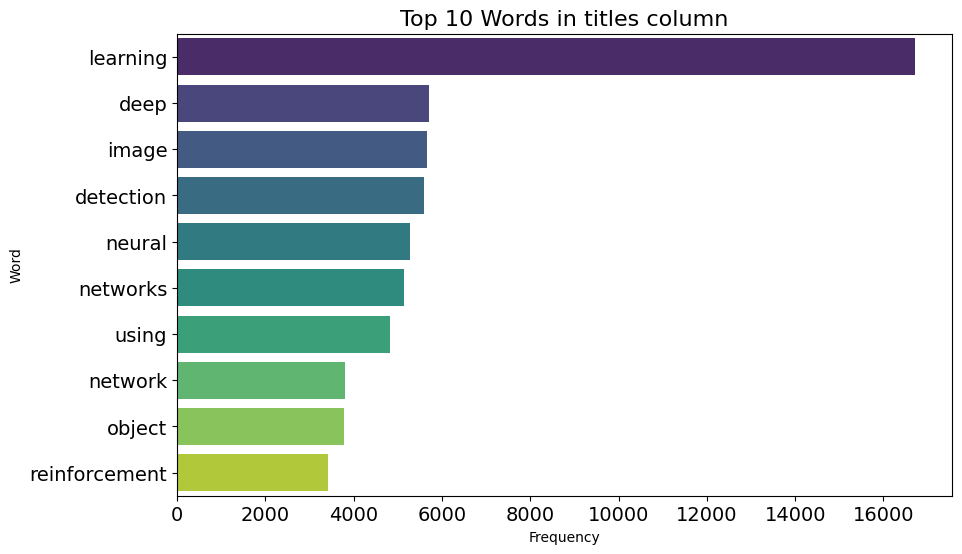

In [25]:
plot_top_words(titles_dataset, 'titles')

### Content-based approach using abstracts

Let's us now explore the second approach.

We will be dropping the title column and keeping the abstract column.

In [26]:
abstracts_dataset = arxiv_data.drop(columns = ["titles"])

In [27]:
abstracts_dataset.head()

,abstracts,terms,urls
0,"Segmenting unseen objects from images is a critical perception skill that a\nrobot needs to acquire. In robot manipulation, it can facilitate a robot to\ngrasp and manipulate unseen objects. Mean shift clustering is a widely used\nmethod for image segmentation tasks. However, the traditional mean shift\nclustering algorithm is not differentiable, making it difficult to integrate it\ninto an end-to-end neural network training framework. In this work, we propose\nthe Mean Shift Mask Transformer (MSMFormer), a new transformer architecture\nthat simulates the von Mises-Fisher (vMF) mean shift clustering algorithm,\nallowing for the joint training and inference of both the feature extractor and\nthe clustering. Its central component is a hypersphere attention mechanism,\nwhich updates object queries on a hypersphere. To illustrate the effectiveness\nof our method, we apply MSMFormer to unseen object instance segmentation. Our\nexperiments show that MSMFormer achieves competitive performance compared to\nstate-of-the-art methods for unseen object instance segmentation. The video and\ncode are available at https://irvlutd.github.io/MSMFormer","[cs.CV, cs.AI, cs.LG, cs.RO]",http://arxiv.org/abs/2211.11679v2
1,"Aerial Image Segmentation is a top-down perspective semantic segmentation and\nhas several challenging characteristics such as strong imbalance in the\nforeground-background distribution, complex background, intra-class\nheterogeneity, inter-class homogeneity, and tiny objects. To handle these\nproblems, we inherit the advantages of Transformers and propose AerialFormer,\nwhich unifies Transformers at the contracting path with lightweight\nMulti-Dilated Convolutional Neural Networks (MD-CNNs) at the expanding path.\nOur AerialFormer is designed as a hierarchical structure, in which Transformer\nencoder outputs multi-scale features and MD-CNNs decoder aggregates information\nfrom the multi-scales. Thus, it takes both local and global contexts into\nconsideration to render powerful representations and high-resolution\nsegmentation. We have benchmarked AerialFormer on three common datasets\nincluding iSAID, LoveDA, and Potsdam. Comprehensive experiments and extensive\nablation studies show that our proposed AerialFormer outperforms previous\nstate-of-the-art methods with remarkable performance. Our source code will be\npublicly available upon acceptance.",[cs.CV],http://arxiv.org/abs/2306.06842v1
2,"The integration of diverse visual prompts like clicks, scribbles, and boxes\nin interactive image segmentation could significantly facilitate user\ninteraction as well as improve interaction efficiency. Most existing studies\nfocus on a single type of visual prompt by simply concatenating prompts and\nimages as input for segmentation prediction, which suffers from low-efficiency\nprompt representation and weak interaction issues. This paper proposes a simple\nyet effective Visual Prompt Unified Transformer (VPUFormer), which introduces a\nconcise unified prompt representation with deeper interaction to boost the\nsegmentation performance. Specifically, we design a Prompt-unified Encoder\n(PuE) by using Gaussian mapping to generate a unified one-dimensional vector\nfor click, box, and scribble prompts, which well captures users' intentions as\nwell as provides a denser representation of user prompts. In addition, we\npresent a Prompt-to-Pixel Contrastive Loss (P2CL) that leverages user feedback\nto gradually refine candidate semantic features, aiming to bring image semantic\nfeatures closer to the features that are similar to the user prompt, while\npushing away those image semantic features that are dissimilar to the user\nprompt, thereby correcting results that deviate from expectations. On this\nbasis, our approach injects prompt representations as queries into Dual-cross\nMerging Attention (DMA) blocks to perform a deeper interaction between image\nand query inputs. A comprehensive variety of experiments on s

In [28]:
average_abstract_length = int(abstracts_dataset['abstracts'].apply(len).mean())
print(f"The average text length of an abstract is {average_abstract_length} characters.")

The average text length of an abstract is 1237 characters.


In [40]:
# Calculate the length of each abstract
abstracts_dataset['abstract_length'] = abstracts_dataset['abstracts'].apply(len)

In [43]:
# Calculate the min and max length
min_length = abstracts_dataset['abstract_length'].min()
max_length = abstracts_dataset['abstract_length'].max()

print('The minimum length of an abstract:', min_length)
print('The maximum length of an abstract:', max_length)

The minimum length of an abstract: 39
The maximum length of an abstract: 2790


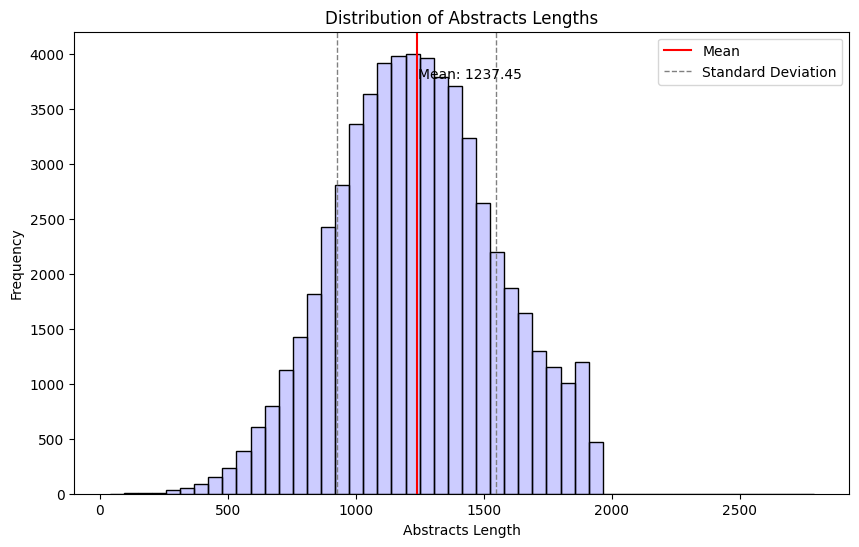

In [29]:
plot_length_distribution(abstracts_dataset, 'abstracts')

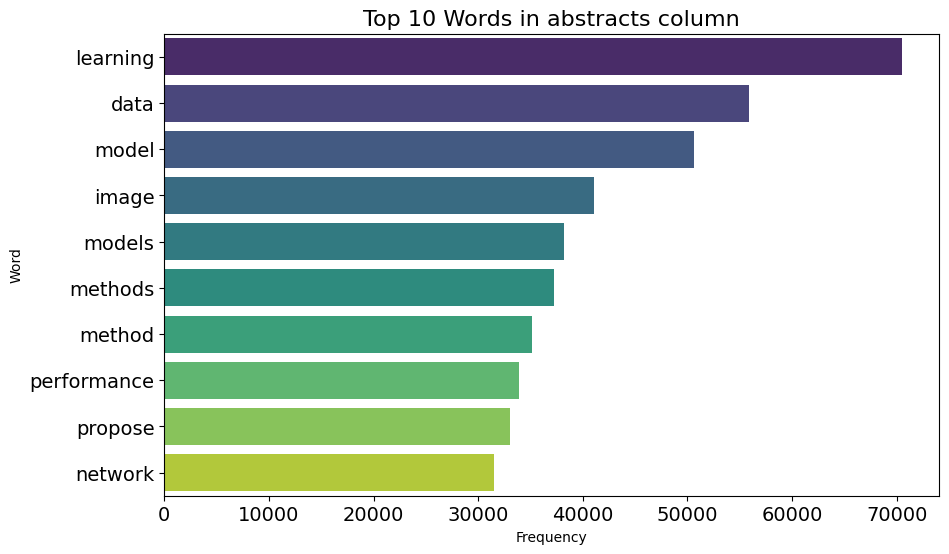

In [30]:
plot_top_words(abstracts_dataset, 'abstracts')

## Observations

The average text length of an abstract is 1237 characters, and its maximum length is 2790 characters. So the best choice is to use a sentence-transformer model with a Max Sequence Length capability of over 2790 characters.

Unfortunately, most pre-trained models have a Max Sequence Length of 512. The transformer model just won't be able to process the entire abstract at once due to its max length constraint, so it processes as much as it can, which in this case is the first 512 words.

A naive approach would be to split the document into chunks, encode each chunk separately and then combine these encodings for a final document-level representation. For example, split a document into sentences, encode each sentence independently and then combine these sentence vectors (e.g., averaging, max-pooling, etc.) for a document representation.

Another approach would be to use a "sliding window". Instead of just taking the first 512 words, I could apply a "sliding window" approach where I first process the first 512 words, then the next 512 words (perhaps with some overlap), and so on until I've processed the whole abstract.

I will first be encoding paper's titles to calculate the similarity. Abstracts will be encoded later on.